In [536]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
import re

test = "     adasd"


print(re.match(r'(.+\s)([a-z])', test,  re.IGNORECASE) is None)
# if (re.match(r'.+\s', test,  re.IGNORECASE) is None):


False


In [512]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import nltk
from nltk.corpus import stopwords
from collections import Counter

from PIL import Image 
from wordcloud import WordCloud, ImageColorGenerator 
# ImageColorGenerator는 Image 로부터 Color 를 생성하는 객체입니다.

In [513]:
year = input("Enter a specific year :")
url='http://cvpr'+year+'.thecvf.com/program/main_conference'
print(url)

Enter a specific year :2019
http://cvpr2019.thecvf.com/program/main_conference


In [514]:
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.text)  


#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [493]:
#Create empty list
col=[]
case=0
#For get first row
for t in tr_elements[0]:
    
    name=t.text_content()
    
    if (re.match(r'(.+\s)([a-z])', name,  re.IGNORECASE) is not None):
        case =1
        continue
    col.append((name,[]))
    
# 아래열 제목 중복방지 필터 List 생성
clist = []

for i in range(0,len(col)):
    clist.append(col[i][0])
    


In [495]:
clist

['Session Title/Poster Group',
 'Poster #',
 'Presentation Time',
 'Title',
 'Author(s)',
 'Paper ID']

In [521]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of specific size, the //tr data is not from our table 
    if len(T)!= len(clist):
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        
        if case == 0:
                      
            data=t.text_content()
         
        #Append the data to the empty list of the i'th column
            if data not in clist:
                col[i][1].append(data)
            
            
            i+=1


        
        elif case == 1 :
            
            
            if i == 1:
                i+=1
                continue
            
            data=t.text_content() 

        
        #Append the data to the empty list of the i'th column
            if data not in clist:
                if i == 0 :
                    col[i][1].append(data)
                elif i !=0 :
                    col[i-1][1].append(data)
            
            i+=1

        
        




In [524]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

df

# pd.set_option('display.max_rows', df.shape[0]+1) #Code to set the property display.max_rows to just more than total rows
# print(df)

,Session Title/Poster Group,Poster #,Presentation Time,Title,Author(s),Paper ID
0,Deep Learning,1,09:00,Finding Task-Relevant Features for Few-Shot Le...,Hongyang Li; David Eigen; Samuel Dodge; Matthe...,5
1,,2,09:05,Edge-Labeling Graph Neural Network for Few-Sho...,Jongmin Kim; Taesup Kim; Sungwoong Kim; Chang ...,6340
2,,3,09:10,Generating Classification Weights With GNN Den...,Spyros Gidaris; Nikos Komodakis,5728
3,,4,09:18,Kervolutional Neural Networks,Chen Wang; Jianfei Yang; Lihua Xie; Junsong Yuan,257
4,,5,09:23,Why ReLU Networks Yield High-Confidence Predic...,Matthias Hein; Maksym Andriushchenko; Julian B...,4863
...,...,...,...,...,...,...
3159,,211,15:20,PointPillars: Fast Encoders for Object Detecti...,Alex H. Lang; Sourabh Vora; Holger Caesar; Lub...,6374
3160,,212,15:20,Motion Estimation of Non-Holonomic Ground Vehi...,Kun Huang; Yifu Wang; Laurent Kneip,6388
3161,,213,15:20,From Coarse to Fine: Robust Hierarchical Local...,Paul-Edouard Sarlin; Cesar Cadena; Roland Sieg...,6575
3162,,214,15:20,Large Scale High-Resolution Land Cover Mapping...,Caleb Robinson; Le Hou; Kolya Malkin; Rachel S...,6731


In [498]:
conf_sbj = [] #Conference Subject List

for data in df[col[0][0]].tolist():
    if data != '':
        conf_sbj.append(data)

tmpindex = df.index[df[col[0][0]] != ''].tolist() # category 나누는 구간 index
tmpindex.append(df.index.tolist()[-1])

In [499]:
dict_conf_sbj = {}  # 각 분야별 논문 제출 개수
tmpiter = 0
for key in conf_sbj:
    if key not in dict_conf_sbj.keys():
        dict_conf_sbj[key]=tmpindex[tmpiter+1]-tmpindex[tmpiter]
        
    else:
        dict_conf_sbj[key]+=tmpindex[tmpiter+1]-tmpindex[tmpiter]
    
    
    tmpiter+=1

In [501]:
df.to_csv(year+'processed_data.csv', encoding='utf-8-sig')

In [525]:
tempdata = df['Title'].tolist()
tempdata = ' '.join(tempdata)

In [526]:
stop_words = stopwords.words("english")
stop_words.append(',')
stop_words.append('.')
stop_words.append('’')
stop_words.append('”')
stop_words.append('—')
stop_words.append('How')
stop_words.append('A')
stop_words.append('From')
stop_words.append('Using')

In [504]:
tokens = nltk.word_tokenize(tempdata)  # 문장을 토큰화한다
tag_res = nltk.pos_tag(tokens)  # 토큰화한 문장을 품사 태깅해 출력한다


In [531]:
#NNP, NNPS, NN, NNS, JJ 만 추출
modify_res = []

for word in tag_res:
    if word[1] in ['NNP','NNPS','NN','NNS']:
        if word[0] not in stop_words:
            modify_res.append(word[0])
            

word_counted = Counter(modify_res)
sort_word_counted = sorted(word_counted.items(), key=lambda x:x[1], reverse=True)

[('Learning', 302),
 ('Image', 184),
 ('Networks', 165),
 ('Network', 139),
 ('Deep', 132),
 ('Detection', 118),
 ('Segmentation', 108),
 ('Object', 104),
 ('Neural', 98),
 ('Video', 94),
 ('Estimation', 82),
 ('Visual', 82),
 ('Adversarial', 81),
 ('Recognition', 77),
 ('Semantic', 62),
 ('Convolutional', 58),
 ('Face', 54),
 ('Domain', 53),
 ('Pose', 53),
 ('Point', 48),
 ('Single', 48),
 ('Generative', 46),
 ('Scene', 44),
 ('Action', 44),
 ('Adaptation', 44),
 ('Shape', 43),
 ('Model', 43),
 ('Graph', 42),
 ('Representation', 42),
 ('Images', 40),
 ('Attention', 40),
 ('Feature', 39),
 ('Efficient', 38),
 ('Motion', 35),
 ('Tracking', 35),
 ('Transfer', 35),
 ('Reconstruction', 34),
 ('Matching', 33),
 ('Depth', 33),
 ('Data', 32),
 ('Human', 32),
 ('Robust', 30),
 ('Person', 30),
 ('Generation', 30),
 ('Instance', 30),
 ('Classification', 27),
 ('Stereo', 27),
 ('Adaptive', 27),
 ('Prediction', 27),
 ('Training', 26),
 ('Search', 26),
 ('Re-Identification', 26),
 ('Metric', 25),
 

In [506]:
sort_word_counted = dict(sort_word_counted[:50])  # 단일단어 상위 50개 추출

In [507]:
corpus = nltk.Text(tokens) 
col_list = corpus.collocation_list()
col_list

# word count에 Collocation 추가
for key2 in col_list:
    sort_word_counted[key2]=tempdata.count(key2)
    
    

In [508]:
del sort_word_counted['Network']
del sort_word_counted['Networks']
del sort_word_counted['Learning']

sort_word_counted['DNN'] = sort_word_counted.pop('Deep')
sort_word_counted['Image']+=sort_word_counted['Images']
del sort_word_counted['Images']

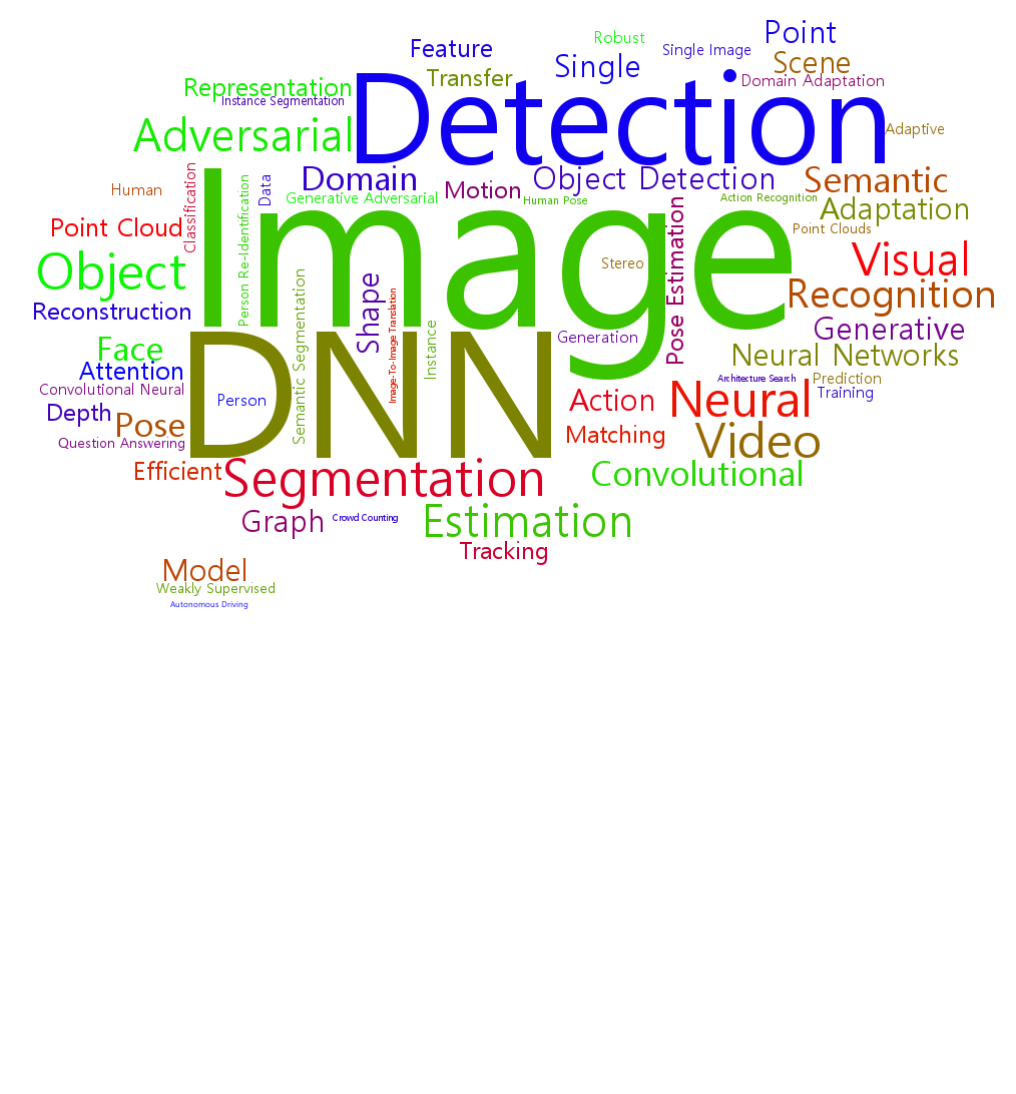

In [509]:
maskjpg = np.array(Image.open("mask.jpg"))


word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=1000, height=500,
                       mask=maskjpg,
                       background_color='white').generate_from_frequencies(sort_word_counted)


plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(colormap='brg'), interpolation='bilinear') # http://j.mp/32UXOQ6
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

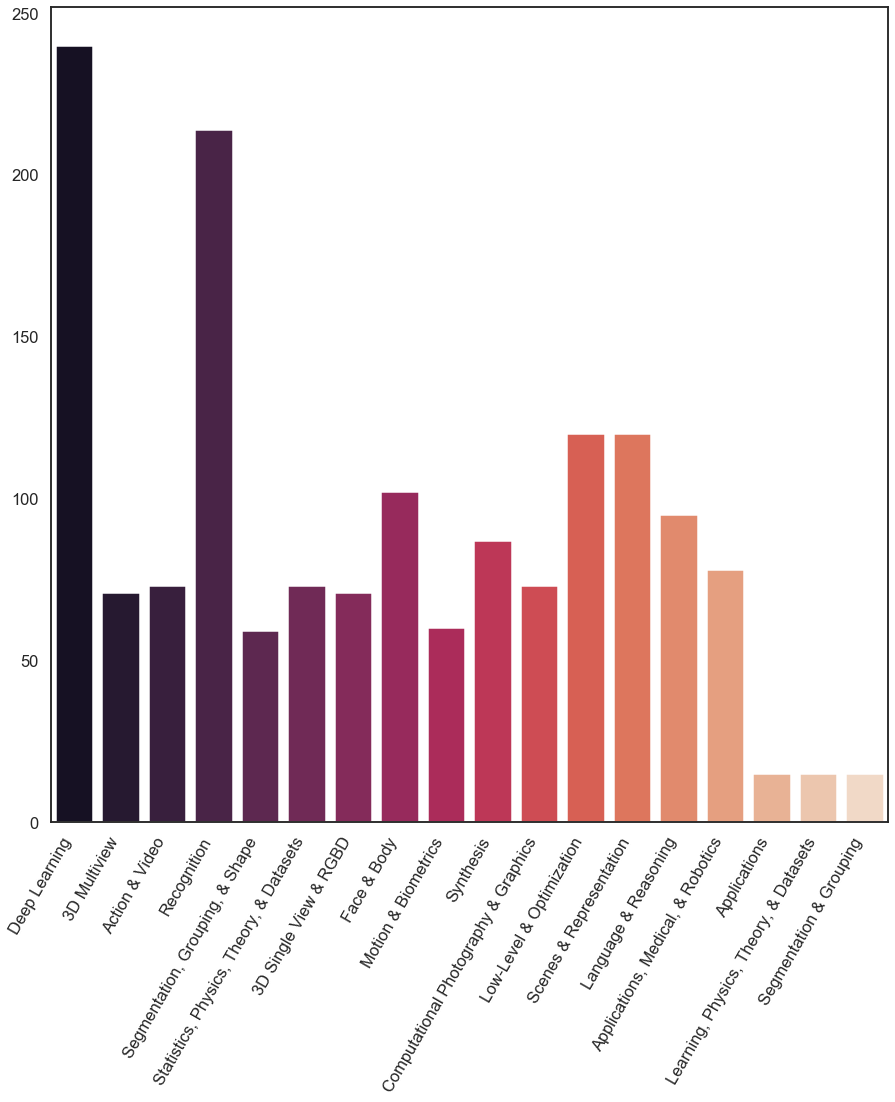

In [510]:
# sns.set(style="white", context="talk")
sns.set(style="white", context="talk")
x = []
y = []
for a, b in dict_conf_sbj.items():
    x.append(a)
    y.append(b)
    

plt.figure(figsize=(15, 15))
chart = sns.barplot(x=x, y=y, palette="rocket")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right');
